# Spectrum changes with single lens imaging

At first, the pupil flane in frequency domain should be reveal.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io as sio
from skimage.transform import resize
import os
import numpy as np

PIXEL_SIZE = 5e-6
PIXEL_NUM = 512
WAVELENGTH = 500e-9

In [19]:
import sys
import imp
sys.path.append("D:\\Workspace\\git_proj\\CCCode")
import imaging_process
imp.reload(imaging_process)
from imaging_process import ft2, ift2, Wavefront, tie_solution, img_val_norm, Check

In [3]:
# import images
imgs_path = "D:\\Workspace\\datasets\\open_image_val_standard"
imgs_name_list = os.listdir(imgs_path)[0:2]
imgs_fpath_list = [os.path.join(imgs_path, img_name) for img_name in imgs_name_list]
amp_img = img_val_norm(resize(sio.imread(imgs_fpath_list[0]), (PIXEL_NUM, PIXEL_NUM)), 0.8, 1)
pha_img = img_val_norm(resize(sio.imread(imgs_fpath_list[1]), (PIXEL_NUM, PIXEL_NUM)), 0.2, 1.5)

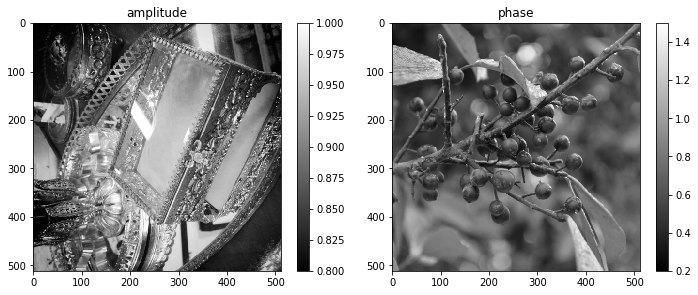

In [4]:
plt.figure(figsize=[10, 4])
plt.subplot(121)
plt.imshow(amp_img, cmap="gray")
plt.title("amplitude")
plt.colorbar()
plt.subplot(122)
plt.imshow(pha_img, cmap="gray")
plt.title("phase")
plt.colorbar()
plt.tight_layout()
plt.show()

In [5]:
ff = 0.1
d1 = 2*ff
d2 = 1/(1/ff - 1/d1)

wf_obj = Wavefront.from_bioimage(amp_img, pha_img, WAVELENGTH, PIXEL_SIZE)
wf_front_lens = wf_obj.spatial_transfer(d1).wavefront

wf_obj_post_lens = Wavefront.pupil_propagate(wf_front_lens, WAVELENGTH, PIXEL_SIZE, ff, out_pupil=True)
lens_pupil_plane = wf_obj_post_lens.lens_pupil_plane
wf_post_lens = wf_obj_post_lens.wavefront

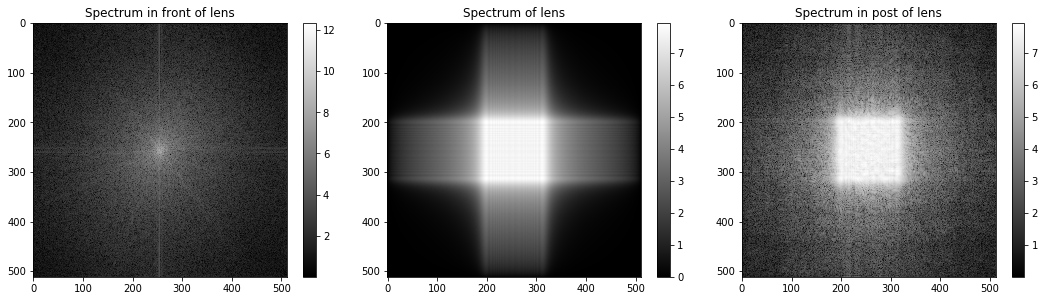

In [15]:
plt.figure(figsize=[15, 4])
plt.subplot(131)
plt.imshow(np.log(abs(ft2(wf_front_lens))+1), cmap="gray")
plt.title("Spectrum in front of lens")
plt.colorbar()
plt.subplot(132)
plt.imshow(np.log(abs(ft2(lens_pupil_plane))+1), cmap="gray")
plt.title("Spectrum of lens")
plt.colorbar()
plt.subplot(133)
plt.imshow(np.log(abs(ft2(wf_post_lens))+1), cmap="gray")
plt.title("Spectrum in post of lens")
plt.colorbar()
plt.tight_layout()
plt.show()

amp min: 0.11464907494103946 amp max: 141837.35724627797
pha min: -3.141580928231549 pha max: 3.1415771065100055


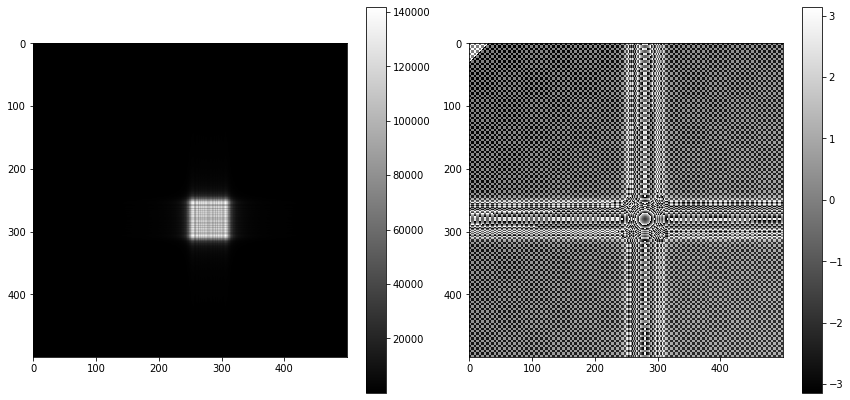

In [23]:
wf_obj = Wavefront.from_bioimage(amp_img, pha_img, WAVELENGTH, PIXEL_SIZE)
t = wf_obj.lens_transfer(0.2)
ck = Check()
ck.wavefront(ft2(t)[1000:1500, 1000:1500])